In [240]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cwd = os.getcwd()
print(cwd)

\\ad\ap\homes$\kmp57\My Documents\GitHub\grid-uk-ml\notebooks


In [235]:
path = r"..\data"
filename = "\df_clean.csv"
df = pd.read_csv(path + filename)
df.reset_index()
df.head()

,Datetime,national_demand,pump_demand,demand_forecast,demand_outturn,demand_forecast_publishdate,f01,f02,f03,f04,...,wind_perc,total_wind_power,wind_forecast_publishdate,wind_forecast,temperature_deg,cloudcover_perc,windspeed_kmh,winddirection_degr,import_export_electricity,import_export_electricity
0,2021-11-01 00:30:00,20724,1476,20370,20530,2021-10-31T08:45:00,0.008494,0.000077,0.000027,1.611739e-05,...,53.8,10267.074,2021-10-31T07:19:46,9176.0,7.1,73,23.7,222.0,1704,1704
1,2021-11-01 01:00:00,20512,1462,20150,20743,2021-10-31T08:45:00,0.013711,0.000029,0.000008,5.010766e-06,...,54.3,10317.332,2021-10-31T07:19:46,9285.0,7.5,80,24.7,214.0,1361,1361
2,2021-11-01 01:30:00,19950,1470,19949,20503,2021-10-31T08:45:00,0.010672,0.000016,0.000002,9.573108e-07,...,54.0,10091.954,2021-10-31T07:19:46,9402.0,7.5,80,24.7,214.0,1306,1306
3,2021-11-01 02:00:00,19277,1414,19553,19924,2021-10-31T08:45:00,0.020586,0.000015,0.000002,9.279950e-07,...,55.0,10187.366,2021-10-31T07:19:46,9525.0,7.7,100,25.6,215.0,340,340
4,2021-11-01 02:30:00,18909,1296,19123,19261,2021-10-31T08:45:00,0.005257,0.000020,0.000006,2.867731e-06,...,55.4,10128.426,2021-10-31T07:19:46,9652.0,7.7,100,25.6,215.0,182,182


### Error Histogram

Text(0, 0.5, 'Counts')

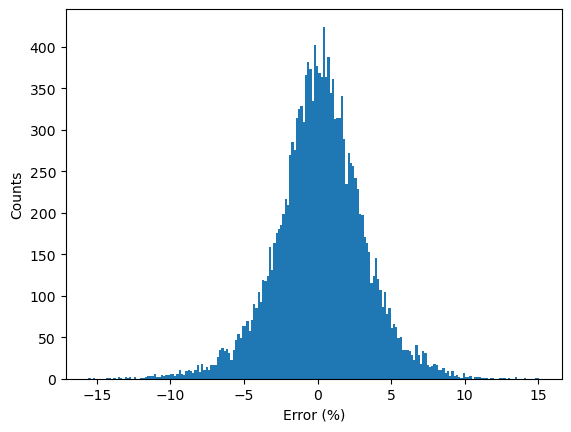

In [236]:
df["demand_forecast_error"] = (df["demand_forecast"] - df["demand_outturn"])/df["national_demand"]*100
df["wind_forecast_error"] = (df["wind_forecast"] - df["total_wind_power"])/df["total_wind_power"]*100

plt.hist(df["demand_forecast_error"], 200)

plt.xlabel("Error (%)")
plt.ylabel("Counts")

#plt.plot(df["demand_forecast_error"])

#plt.plot(df["demand_forecast_error"] - abs(df["demand_forecast_error_calc"]))

### Find 10 largest error events ( positive and negative separate)

In [246]:
n = 1000
events_pos = df["demand_forecast_error"].nlargest(n)
events_neg = df["demand_forecast_error"].nsmallest(n)


idx_pos = events_pos.index
idx_neg = events_neg.index

idx_pos_select = []
idx_neg_select = []
for ii in range(0,100):
    idx = idx_pos[ii]
    idx_cons = (abs(idx-idx_pos)<=4) & (abs(idx-idx_pos)>0)
    idx_pos = np.delete(idx_pos,idx_cons)
    idx_pos_select.append(idx)
    
    idx = idx_neg[ii]
    idx_cons = (abs(idx-idx_neg)<=4) & (abs(idx-idx_neg)>0)
    idx_neg = np.delete(idx_neg,idx_cons)
    idx_neg_select.append(idx)
    
(df.loc[idx_pos_select])
# (df.loc[idx_neg_select])

,Datetime,national_demand,pump_demand,demand_forecast,demand_outturn,demand_forecast_publishdate,f01,f02,f03,f04,...,wind_forecast_publishdate,wind_forecast,temperature_deg,cloudcover_perc,windspeed_kmh,winddirection_degr,import_export_electricity,import_export_electricity,demand_forecast_error,wind_forecast_error
8229,2022-04-21 13:00:00,22470,2,26305,22919,2022-04-20T08:45:00,0.076241,0.000060,0.000022,0.000014,...,2022-04-20T07:19:40,6776.0,15.5,2,26.5,21.0,-799,-799,15.068981,17.474710
8182,2022-04-20 13:30:00,23376,625,26739,23580,2022-04-19T08:45:00,0.032891,0.000036,0.000012,0.000008,...,2022-04-19T07:21:12,3474.0,16.2,27,15.0,333.0,-1178,-1178,13.513860,3.121059
7990,2022-04-16 13:30:00,17951,1496,20519,18276,2022-04-15T08:45:00,0.057031,0.000087,0.000030,0.000019,...,2022-04-15T07:21:23,5155.0,14.5,100,21.7,249.0,2803,2803,12.495126,6.352735
13419,2022-08-07 16:00:00,19032,37,20058,17967,2022-08-06T08:45:00,0.056052,0.000062,0.000026,0.000016,...,2022-08-06T07:23:10,2180.0,18.5,100,28.9,186.0,2589,2589,10.986759,-28.563424
12635,2022-07-22 08:00:00,27678,7,29190,26165,2022-07-21T08:45:00,0.046955,0.000090,0.000033,0.000021,...,2022-07-21T07:22:49,1326.0,14.6,100,18.0,348.0,222,222,10.929258,-17.203140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14344,2022-08-26 22:30:00,23315,4,25890,24362,2022-08-25T08:45:00,0.057459,0.000007,0.000003,0.000001,...,2022-08-25T07:21:24,519.0,14.5,52,6.2,100.0,394,394,6.553721,1.597767
15426,2022-09-18 11:30:00,21463,6,22522,21116,2022-09-17T08:45:00,0.036761,0.000064,0.000067,0.000084,...,2022-09-17T07:22:03,5673.0,14.4,100,12.9,157.0,3922,3922,6.550808,-16.490290
81,2021-11-02 17:00:00,40973,1,42092,39411,2021-11-01T08:45:00,0.013703,0.000015,0.000004,0.000003,...,2021-11-01T07:19:36,927.0,7.5,94,10.5,278.0,3762,3762,6.543333,-13.003491
12853,2022-07-26 21:00:00,27001,10,28920,27155,2022-07-25T08:45:00,0.018350,0.000034,0.000012,0.000008,...,2022-07-25T07:22:45,997.0,13.6,30,20.7,130.0,-762,-762,6.536795,-39.885439


### Plot Temperature vs demand error

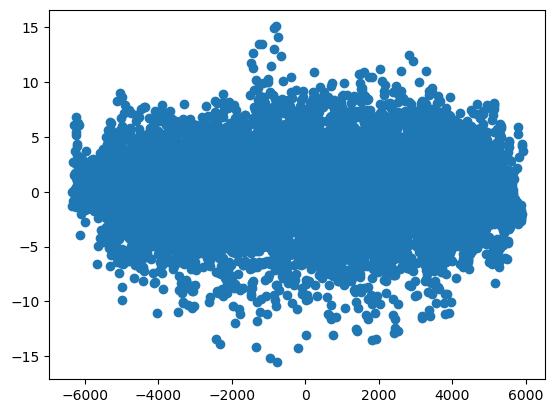

In [238]:
plt.scatter(df["import_export_electricity"],df["demand_forecast_error"])

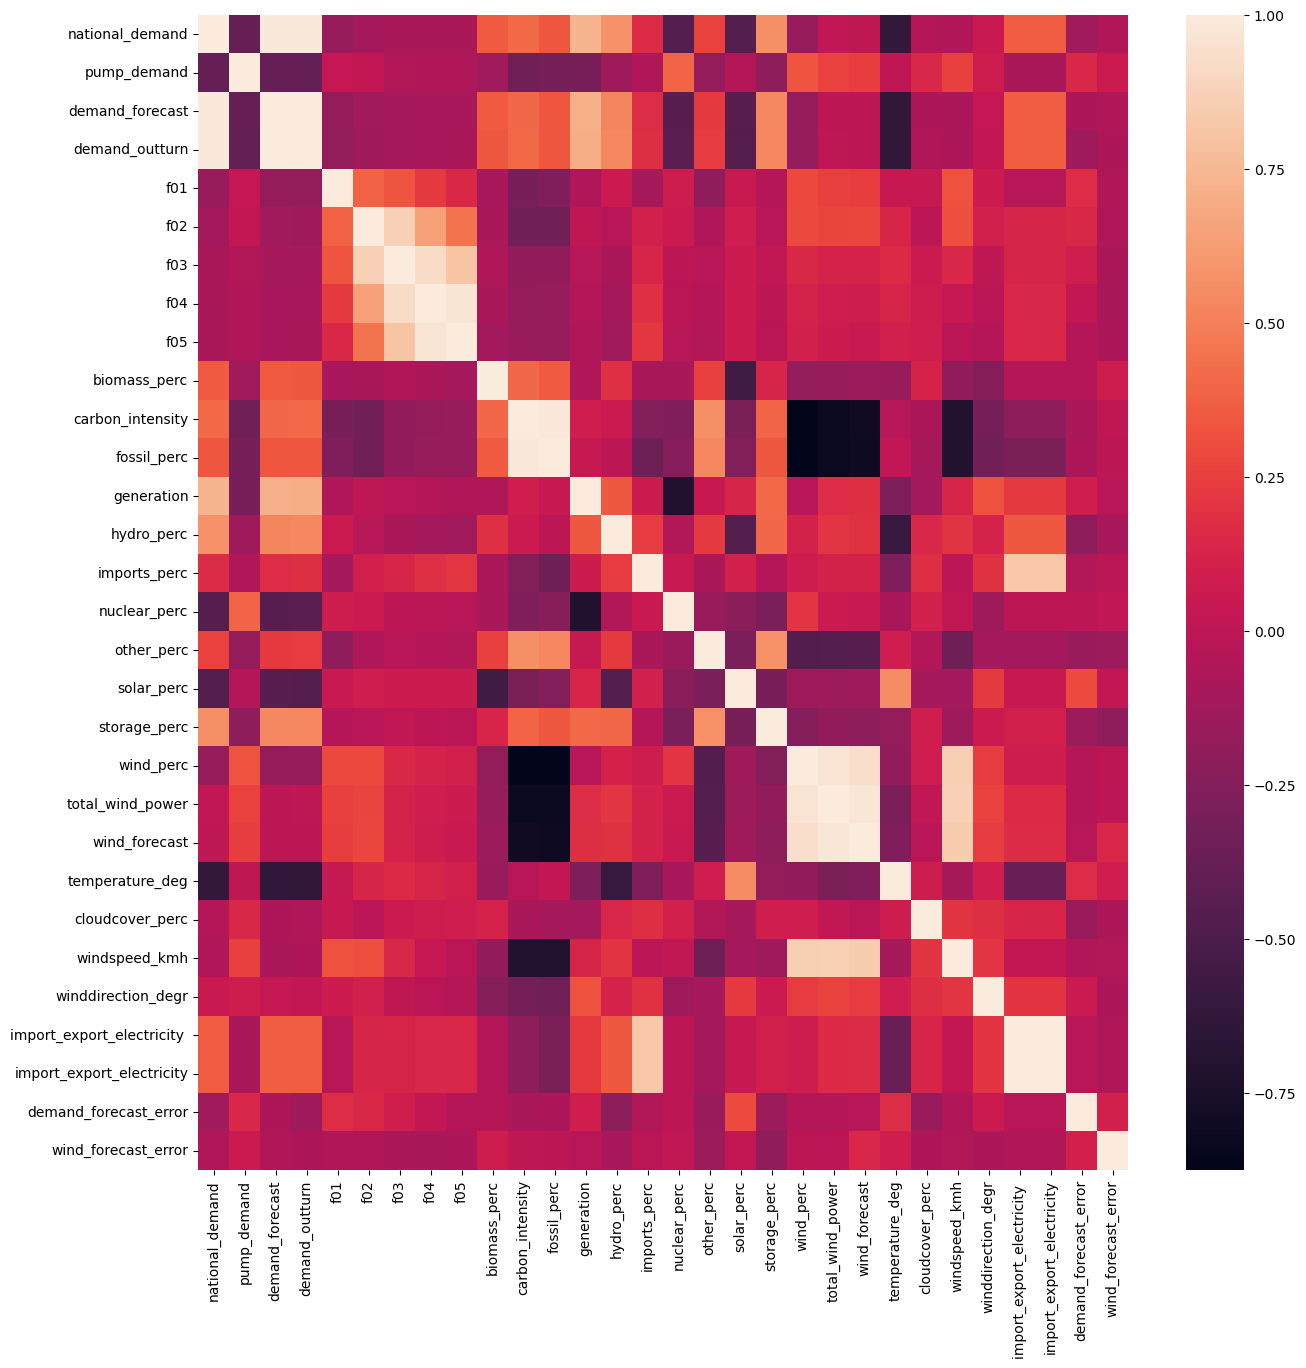

In [248]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.loc[idx_pos_select].corr());